In [ ]:
stuff

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Teilchen Dichte
Ermitelung durch Rechteck- und Dreieckfunktion

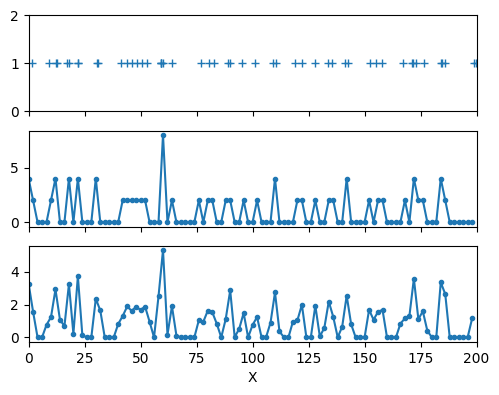

In [3]:
n_p = 50 # Teilchenzahl
dx = 2 # Gitterpunkt abstand
nx = 100 # Gitterpunkte

lx = float(dx * nx) # system länge
xx = dx * np.arange(nx)
xp = np.random.rand(n_p) * lx
##-- box-car shape --##
ds1 = np.zeros(nx)
for ip in range(n_p):
    ix = np.mod(int(np.round(xp[ip]/dx)),nx)
    ds1[ix] += 1

##-- triangular shape --##
ds2 = np.zeros(nx) 
for ip in range(n_p):
    ixm = int(np.floor(xp[ip]/dx))
    ixp = np.mod(ixm + 1, nx)
    wxp = xp[ip]/dx - ixm
    wxm = 1. - wxp
    ds2[ixm] += wxm
    ds2[ixp] += wxp

# normierung
ds1 = ds1 * nx/n_p
ds2 = ds2 * nx/n_p

##-- figure --##
fig = plt.figure()
ax1 = fig.add_subplot(311, xlabel="")
ax2 = fig.add_subplot(312, xlabel="")
ax3 = fig.add_subplot(313, xlabel="X")
fig.subplots_adjust(bottom=0.2, left=0.2, top=0.88,
right=0.9, hspace=0.2)
ax1.set_xlim(0, lx)
ax1.set_ylim(0, 2)
ax2.set_xlim(0, lx)
ax3.set_xlim(0, lx)
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax1.plot(xp, np.ones(n_p), '+')
ax2.plot(xx, ds1, '.-')
ax3.plot(xx, ds2, '.-')
plt.show()

## E-feld durch FFT

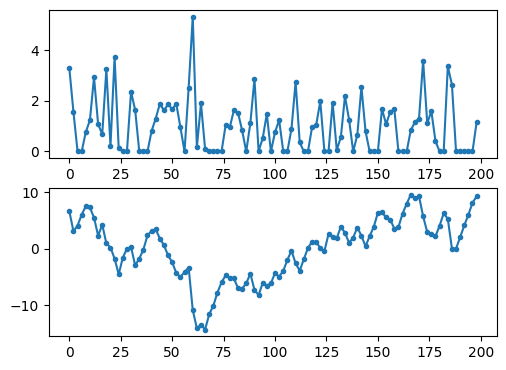

In [4]:
kk = (2.*np.pi) * np.fft.fftfreq(nx, d=dx)
kk[0] = 1e-6
exfft = 1j * np.fft.fft(ds2) / kk
exfft[0] = 0
exfft[int(nx/2)] = 0
ex = np.real(np.fft.ifft(exfft))

fig, (ax1, ax2) = plt.subplots(2)
#fig = plt.figure()
#ax1 = fig.add_subplot(211, xlabel="")
#ax2 = fig.add_subplot(212, xlabel="")
fig.subplots_adjust(bottom=0.2, left=0.2, top=0.88,
right=0.9, hspace=0.2)
ax1.plot(xx, ds2, '.-')
ax2.plot(xx, ex, '.-')
plt.show()

# Phasenraum plot

## Geht nicht

In [3]:
n_p = 1000
dx = 2.
nx = 128
vth = 1.
dt = 0.5
nt = 256
lx = float(dx * nx)
xx = dx * np.arange(nx)
xp = np.linspace(0,lx-lx/n_p,n_p)
vp = np.random.normal(loc=0., scale=vth, size=n_p)
##-- figure preparation --##
cm = 1/2.54
fig = plt.figure(figsize=(8.5*cm, 6.0*cm), facecolor="white")
ax1 = fig.add_subplot(111)

##-- time integration --##
for it in range(0, nt, 1):
    xp = xp + dt*vp
    xp[xp > lx] = xp[xp > lx] - lx
    xp[xp < 0] = xp[xp < 0] + lx
    title = "it:" + format(it,"5")
    ax1.clear()
    fig.suptitle(title)
    ax1.set_xlim(0, lx)
    ax1.set_ylim(-10, 10)
    ax1.plot(xp, vp, '.', color='black')
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.1)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

: 